In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## download new york geojson data

In [2]:
with open("nyu_2451_34572-geojson.json") as json_data:
    newyork_data = json.load(json_data)

In [3]:
newyork_data

{'bbox': [-74.2492599487305,
  40.5033187866211,
  -73.7061614990234,
  40.9105606079102],
 'crs': {'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}, 'type': 'name'},
 'features': [{'geometry': {'coordinates': [-73.84720052054902,
     40.89470517661],
    'type': 'Point'},
   'geometry_name': 'geom',
   'id': 'nyu_2451_34572.1',
   'properties': {'annoangle': 0.0,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661],
    'borough': 'Bronx',
    'name': 'Wakefield',
    'stacked': 1},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-73.82993910812398, 40.87429419303012],
    'type': 'Point'},
   'geometry_name': 'geom',
   'id': 'nyu_2451_34572.2',
   'properties': {'annoangle': 0.0,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.874294193

In [4]:
newyork_data['features'][0]

{'geometry': {'coordinates': [-73.84720052054902, 40.89470517661],
  'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.1',
 'properties': {'annoangle': 0.0,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661],
  'borough': 'Bronx',
  'name': 'Wakefield',
  'stacked': 1},
 'type': 'Feature'}

In [5]:
borough_name = [neighbourhood['properties']['borough'] for neighbourhood in newyork_data['features']]
neighbourhood_name = [neighbourhood['properties']['name'] for neighbourhood in newyork_data['features']]
neighbourhood_latitude = [neighbourhood['geometry']['coordinates'][1] for neighbourhood in newyork_data['features']]
neighbourhood_longitude = [neighbourhood['geometry']['coordinates'][0] for neighbourhood in newyork_data['features']]

In [6]:
neighborhoods = pd.DataFrame({'Borough':borough_name,'Neighborhood':neighbourhood_name,
                              'Latitude':neighbourhood_latitude,'Longitude':neighbourhood_longitude})
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


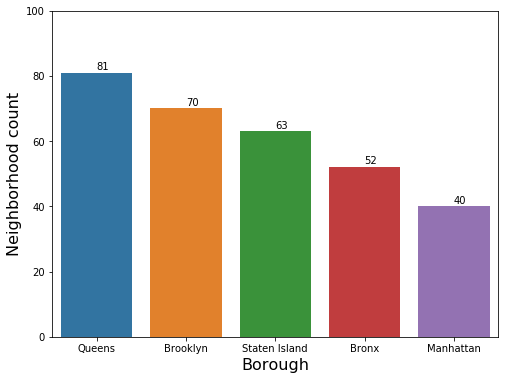

In [7]:
plt.figure(figsize=(8,6))

ax = sns.countplot(neighborhoods['Borough'],order=neighborhoods['Borough'].value_counts().index)
ax.set_xlabel('Borough',fontsize=16)
ax.set_ylabel('Neighborhood count',fontsize=16)
ax.set_ylim(0,100)

neighborhood_count = neighborhoods['Borough'].value_counts().values
for i, count in enumerate(neighborhood_count):
    ax.text(i, count+1, count)

## pinpoint neighborhoods in map

In [19]:
geolocator = Nominatim(user_agent='capstone_project')
location = geolocator.geocode('New York City, NY')
latitude = location.latitude
longitude = location.longitude

In [31]:
NY_map = folium.Map(location=[latitude,longitude],zoom_start=10)

for borough, neighborhood, lat, lng in zip(neighborhoods['Borough'],neighborhoods['Neighborhood'],
                                           neighborhoods['Latitude'],neighborhoods['Longitude']):
    label = '{}, {}'.format(borough, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7).add_to(NY_map)
NY_map

## Focus on Manhattan

In [35]:
Manhattan = neighborhoods[neighborhoods['Borough']=='Manhattan']
Manhattan.reset_index(drop=True,inplace=True)
Manhattan.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [50]:
Manhattan.shape

(40, 4)

In [38]:
geolocator = Nominatim(user_agent='capstone_project')
location = geolocator.geocode('Manhattan, New York')
latitude = location.latitude
longitude = location.longitude

In [49]:
Manhattan_map = folium.Map(location=[latitude, longitude], zoom_start=11)

for i,row in Manhattan.iterrows():
    borough=row[0]
    neighborhood=row[1]
    lat=row[2]
    lng=row[3]
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7).add_to(Manhattan_map)
Manhattan_map

## Explore the first neighborhood in Manhattan

In [51]:
Marble_Hill = Manhattan.iloc[0,:]

In [54]:
Marble_Hill_lat = Marble_Hill['Latitude']
Marble_Hill_lng = Marble_Hill['Longitude']

In [58]:
#explore venues in Marble Hill neighborhood
CLIENT_ID = 'TF4JONKZ55W1IM1CEDSWJDEXDZ20FBK1YVR4LZP3TGWBPIH0' # your Foursquare ID
CLIENT_SECRET = 'OLHQ1BY10MIBBVVTCFMUINEHAHS103PVVXUULBGEPXNG3BK1' # your Foursquare Secret
VERSION = '20190622' # Foursquare API version
RADIUS = 500
LIMIT = 100

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Marble_Hill_lat, 
    Marble_Hill_lng, 
    RADIUS, 
    LIMIT)
print(url)

https://api.foursquare.com/v2/venues/explore?&client_id=TF4JONKZ55W1IM1CEDSWJDEXDZ20FBK1YVR4LZP3TGWBPIH0&client_secret=OLHQ1BY10MIBBVVTCFMUINEHAHS103PVVXUULBGEPXNG3BK1&v=20190622&ll=40.87655077879964,-73.91065965862981&radius=500&limit=100


In [61]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d0e505c86bc49002c01f7cc'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4b4429abf964a52037f225e3-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d1ca941735',
         'name': 'Pizza Place',
         'pluralName': 'Pizza Places',
         'primary': True,
         'shortName': 'Pizza'}],
       'delivery': {'id': '72548',
        'provider': {'icon': {'name': '/delivery_provider_seamless_20180129.png',
          'prefix': 'https://fastly.4sqi.net/img/general/cap/',
          'sizes': [40, 50]},
         'name': 'seamless'},
        'url': 'https://www.seamless.com/menu/arturos-pizza-5189-broadway-ave-new-york/72548?affiliate=1131&utm_source=foursquare-affiliat

In [73]:
venues_list = results['response']['groups'][0]['items']

In [78]:
venues_list[0]

{'reasons': {'count': 0,
  'items': [{'reasonName': 'globalInteractionReason',
    'summary': 'This spot is popular',
    'type': 'general'}]},
 'referralId': 'e-0-4b4429abf964a52037f225e3-0',
 'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_',
     'suffix': '.png'},
    'id': '4bf58dd8d48988d1ca941735',
    'name': 'Pizza Place',
    'pluralName': 'Pizza Places',
    'primary': True,
    'shortName': 'Pizza'}],
  'delivery': {'id': '72548',
   'provider': {'icon': {'name': '/delivery_provider_seamless_20180129.png',
     'prefix': 'https://fastly.4sqi.net/img/general/cap/',
     'sizes': [40, 50]},
    'name': 'seamless'},
   'url': 'https://www.seamless.com/menu/arturos-pizza-5189-broadway-ave-new-york/72548?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affiliate&utm_campaign=1131&utm_content=72548'},
  'id': '4b4429abf964a52037f225e3',
  'location': {'address': '5198 Broadway',
   'cc': 'US',
   'city': 'New York',

In [94]:
venue_name = [venues_list[i]['venue']['name'] for i in range(len(venues_list))]
venue_cat = [venues_list[i]['venue']['categories'][0]['name'] for i in range(len(venues_list))]

venue_lat = [venues_list[i]['venue']['location']['lat'] for i in range(len(venues_list))]
venue_lng = [venues_list[i]['venue']['location']['lng'] for i in range(len(venues_list))]

In [95]:
Marble_Hill_venues = pd.DataFrame({'venue_name':venue_name, 'venue_cat':venue_cat,
                                   'venue_lat':venue_lat, 'venue_lng':venue_lng})

Marble_Hill_venues.head()

,venue_name,venue_cat,venue_lat,venue_lng
0,Arturo's,Pizza Place,40.874412,-73.910271
1,Bikram Yoga,Yoga Studio,40.876844,-73.906204
2,Tibbett Diner,Diner,40.880404,-73.908937
3,Starbucks,Coffee Shop,40.877531,-73.905582
4,Dunkin',Donut Shop,40.877136,-73.906666


In [103]:
Marble_Hill_map = folium.Map(location=[Marble_Hill_lat, Marble_Hill_lng], zoom_start=15)

folium.CircleMarker(
            [Marble_Hill_lat, Marble_Hill_lng],
            radius=8,
            popup=folium.Popup('Marble_Hill, Manhattan', parse_html=True),
            color='red',
            fill=True,
            fill_color='#f44289',
            fill_opacity=0.7).add_to(Marble_Hill_map)

for i,row in Marble_Hill_venues.iterrows():
    venue_name=row[0]
    venue_cat=row[1]
    venue_lat=row[2]
    venue_lng=row[3]
    label = '{}, {}'.format(venue_name, venue_cat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
            [venue_lat, venue_lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7).add_to(Marble_Hill_map)
Marble_Hill_map

## Explore all neighborhoods in Manhattan

In [107]:
neighborhood_venues = {}

for neighborhood, lat, lng in zip(Manhattan['Neighborhood'],Manhattan['Latitude'],Manhattan['Longitude']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    lng, 
    RADIUS, 
    LIMIT)
    res = requests.get(url).json()
    venues_list = res['response']['groups'][0]['items']
    neighborhood_venues[neighborhood] = venues_list

In [113]:
def extact_venues_info(venues_list):
    
    venue_name = [venues_list[i]['venue']['name'] for i in range(len(venues_list))]
    venue_cat = [venues_list[i]['venue']['categories'][0]['name'] for i in range(len(venues_list))]
    venue_lat = [venues_list[i]['venue']['location']['lat'] for i in range(len(venues_list))]
    venue_lng = [venues_list[i]['venue']['location']['lng'] for i in range(len(venues_list))]
    
    return venue_name,venue_cat,venue_lat,venue_lng

In [138]:
neighborhood_venue_df = pd.DataFrame(columns=['neighborhood','venue_name','venue_cat','venue_lat','venue_lng'])

In [139]:
neighborhood_venue_df

,neighborhood,venue_name,venue_cat,venue_lat,venue_lng


In [140]:
for neighborhood, venues_list in neighborhood_venues.items():
    venue_name,venue_cat,venue_lat,venue_lng = extact_venues_info(venues_list)
    temp_df = pd.DataFrame({'neighborhood':neighborhood, 'venue_name':venue_name, 'venue_cat':venue_cat,
                  'venue_lat':venue_lat, 'venue_lng':venue_lng})
    print(neighborhood,temp_df.shape[0])
    neighborhood_venue_df = pd.concat((neighborhood_venue_df,temp_df),axis=0)

neighborhood_venue_df.head()

Marble Hill 26
Chinatown 100
Washington Heights 85
Inwood 58
Hamilton Heights 62
Manhattanville 44
Central Harlem 47
East Harlem 44
Upper East Side 100
Yorkville 100
Lenox Hill 100
Roosevelt Island 33
Upper West Side 100
Lincoln Square 100
Clinton 100
Midtown 100
Murray Hill 100
Chelsea 100
Greenwich Village 100
East Village 100
Lower East Side 60
Tribeca 100
Little Italy 100
Soho 100
West Village 100
Manhattan Valley 59
Morningside Heights 40
Gramercy 100
Battery Park City 100
Financial District 100
Carnegie Hill 100
Noho 100
Civic Center 100
Midtown South 100
Sutton Place 100
Turtle Bay 100
Tudor City 82
Stuyvesant Town 16
Flatiron 100
Hudson Yards 75


,neighborhood,venue_name,venue_cat,venue_lat,venue_lng
0,Marble Hill,Arturo's,Pizza Place,40.874412,-73.910271
1,Marble Hill,Bikram Yoga,Yoga Studio,40.876844,-73.906204
2,Marble Hill,Tibbett Diner,Diner,40.880404,-73.908937
3,Marble Hill,Starbucks,Coffee Shop,40.877531,-73.905582
4,Marble Hill,Dunkin',Donut Shop,40.877136,-73.906666


In [141]:
neighborhood_venue_df.reset_index(inplace=True, drop=True)
neighborhood_venue_df.shape

(3331, 5)

In [144]:
Manhattan.columns = ['borough','neighborhood','neighborhood_lat','neighborhood_lng']

In [145]:
Manhattan.head()

,borough,neighborhood,neighborhood_lat,neighborhood_lng
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [146]:
Manhattan_venues = pd.merge(Manhattan, neighborhood_venue_df, on='neighborhood')
Manhattan_venues.head()

,borough,neighborhood,neighborhood_lat,neighborhood_lng,venue_name,venue_cat,venue_lat,venue_lng
0,Manhattan,Marble Hill,40.876551,-73.91066,Arturo's,Pizza Place,40.874412,-73.910271
1,Manhattan,Marble Hill,40.876551,-73.91066,Bikram Yoga,Yoga Studio,40.876844,-73.906204
2,Manhattan,Marble Hill,40.876551,-73.91066,Tibbett Diner,Diner,40.880404,-73.908937
3,Manhattan,Marble Hill,40.876551,-73.91066,Starbucks,Coffee Shop,40.877531,-73.905582
4,Manhattan,Marble Hill,40.876551,-73.91066,Dunkin',Donut Shop,40.877136,-73.906666


## Analyze each neighborhood in Manhattan

In [268]:
Manhattan_venue_onehot = pd.get_dummies(Manhattan_venues[['venue_cat']],prefix='', prefix_sep='')

In [269]:
Manhattan_venue_onehot = pd.concat((Manhattan_venues[['neighborhood']],Manhattan_venue_onehot),axis=1)
Manhattan_venue_onehot.head()

,neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Bookstore,College Cafeteria,College Gym,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Ski Shop,Smoke Shop,Snack P

In [270]:
#group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
Manhattan_venue_grouped = Manhattan_venue_onehot.groupby('neighborhood').mean().reset_index()
Manhattan_venue_grouped.head()

,neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Bookstore,College Cafeteria,College Gym,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Ski Shop,Smoke Shop,Snack P

In [271]:
#each neighborhood's top5 most frequent venues
for i, row in Manhattan_venue_grouped.iterrows():
    neighborhood = row['neighborhood']
    venues = row[1:]
    venues_sorted = venues.sort_values(ascending=False)
    print('---'+neighborhood+' top5'+'---')
    for venue,freq_value in venues_sorted[:5].iteritems():      
        print('{:<25}  {:>25}'.format(venue, round(freq_value,2)))
    print('\n')

---Battery Park City top5---
Park                                            0.08
Coffee Shop                                     0.07
Hotel                                           0.05
Memorial Site                                   0.04
Gym                                             0.04


---Carnegie Hill top5---
Coffee Shop                                     0.06
Pizza Place                                     0.06
Café                                            0.04
Yoga Studio                                     0.03
Bookstore                                       0.03


---Central Harlem top5---
African Restaurant                              0.06
Public Art                                      0.04
Art Gallery                                     0.04
Seafood Restaurant                              0.04
Chinese Restaurant                              0.04


---Chelsea top5---
Coffee Shop                                     0.06
Ice Cream Shop                                 

##  create the new dataframe of top 10 venues for each neighborhood.

In [272]:
columns = ['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'] +\
          [str(i+1)+'th Most Common Venue' for i in range(3,10)]

Manhattan_venue_top10 = pd.DataFrame(columns=columns)
Manhattan_venue_top10['Neighborhood'] = Manhattan_venue_grouped['neighborhood']
Manhattan_venue_top10.set_index('Neighborhood',inplace=True)
Manhattan_venue_top10.reset_index(inplace=True)
Manhattan_venue_top10.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Carnegie Hill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Central Harlem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Chelsea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chinatown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [273]:
for i, row in Manhattan_venue_grouped.iterrows():
    Manhattan_venue_top10.iloc[i,1:] = row[1:].sort_values(ascending=False)[:10].index

In [274]:
Manhattan_venue_top10

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Memorial Site,Gym,Wine Shop,Clothing Store,Italian Restaurant,Women's Store,BBQ Joint
1,Carnegie Hill,Coffee Shop,Pizza Place,Café,Yoga Studio,Bookstore,Wine Shop,Cosmetics Shop,French Restaurant,Bar,Japanese Restaurant
2,Central Harlem,African Restaurant,Public Art,Art Gallery,Seafood Restaurant,Chinese Restaurant,Gym / Fitness Center,French Restaurant,American Restaurant,Cosmetics Shop,Liquor Store
3,Chelsea,Coffee Shop,Ice Cream Shop,Italian Restaurant,Bakery,Nightclub,Theater,Seafood Restaurant,American Restaurant,Hotel,Art Gallery
4,Chinatown,Chinese Restaurant,American Restaurant,Cocktail Bar,Spa,Dumpling Restaurant,Vietnamese Restaurant,Bubble Tea Shop,Optical Shop,Salon / Barbershop,Ice Cream Shop
5,Civic Center,Italian Restaurant,Gym / Fitness Center,Sandwich Place,French Restaurant,Coffee Shop,Yoga Studio,Spa,Park,Hotel,American Restaurant
6,Clinton,Theater,Italian Restaurant,Gym / Fitness Center,American Restaurant,Hotel,Coffee Shop,Sandwich Place,Wine Shop,Spa,New American Restaurant
7,East Harlem,Mexican Restaurant,Deli / Bodega,Bakery,Latin American Restaurant,Thai Restaurant,Convenience Store,Café,Gas Station,Taco Place,Steakhouse
8,East Village,Bar,Wine Bar,Mexican Restaurant,Chinese Restaurant,Ice Cream Shop,Pizza Place,Cocktail Bar,Ramen Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant
9,Financial District,Coffee Shop,Steakhouse,Wine Shop,Gym,Bar,Gym / Fitness Center,Hotel,American Restaurant,Cocktail Bar,Café


## Clustering the neighborhoods

In [275]:
Manhattan_venue_grouped.head()

,neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Bookstore,College Cafeteria,College Gym,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Ski Shop,Smoke Shop,Snack P

In [276]:
#Run k-means to cluster the neighborhood into 5 clusters.
Manhattan_venue_clustering = Manhatten_venue_grouped.drop('neighborhood',axis=1)
k = 5
kmean = KMeans(n_clusters=k)
kmean.fit(Manhatten_venue_clustering)
kmean.labels_

array([3, 3, 2, 2, 2, 2, 0, 1, 3, 3, 3, 3, 2, 1, 0, 1, 3, 0, 2, 3, 3, 1,
       3, 0, 0, 1, 3, 2, 1, 2, 4, 3, 2, 1, 3, 2, 2, 1, 2, 3])

In [277]:
Manhattan.head()

,borough,neighborhood,neighborhood_lat,neighborhood_lng
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [278]:
Manhattan_venue_top10.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Memorial Site,Gym,Wine Shop,Clothing Store,Italian Restaurant,Women's Store,BBQ Joint
1,Carnegie Hill,Coffee Shop,Pizza Place,Café,Yoga Studio,Bookstore,Wine Shop,Cosmetics Shop,French Restaurant,Bar,Japanese Restaurant
2,Central Harlem,African Restaurant,Public Art,Art Gallery,Seafood Restaurant,Chinese Restaurant,Gym / Fitness Center,French Restaurant,American Restaurant,Cosmetics Shop,Liquor Store
3,Chelsea,Coffee Shop,Ice Cream Shop,Italian Restaurant,Bakery,Nightclub,Theater,Seafood Restaurant,American Restaurant,Hotel,Art Gallery
4,Chinatown,Chinese Restaurant,American Restaurant,Cocktail Bar,Spa,Dumpling Restaurant,Vietnamese Restaurant,Bubble Tea Shop,Optical Shop,Salon / Barbershop,Ice Cream Shop


In [279]:
left_df = Manhattan
right_df = Manhattan_venue_top10.rename(columns={'Neighborhood':'neighborhood'})

In [280]:
manhattan_merged = pd.merge(left_df,right_df,on='neighborhood')
manhattan_merged['label'] = kmean.labels_
manhattan_merged.head()

,borough,neighborhood,neighborhood_lat,neighborhood_lng,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,label
0,Manhattan,Marble Hill,40.876551,-73.910660,Coffee Shop,Discount Store,Sandwich Place,Yoga Studio,Tennis Stadium,Supplement Shop,Steakhouse,Spa,Seafood Restaurant,Clothing Store,3
1,Manhattan,Chinatown,40.715618,-73.994279,Chinese Restaurant,American Restaurant,Cocktail Bar,Spa,Dumpling Restaurant,Vietnamese Restaurant,Bubble Tea Shop,Optical Shop,Salon / Barbershop,Ice Cream Shop,3
2,Manhattan,Washington Heights,40.851903,-73.936900,Café,Mobile Phone Shop,Bakery,Deli / Bodega,Spanish Restaurant,Latin American Restaurant,New American Restaurant,Sandwich Place,Tapas Restaurant,Mexican Restaurant,2
3,Manhattan,Inwood,40.867684,-73.921210,Mexican Restaurant,Café,Lounge,Bakery,Pizza Place,Park,Frozen Yogurt Shop,Chinese Restaurant,Deli / Bodega,American Restaurant,2
4,Manhattan,Hamilton Heights,40.823604,-73.949688,Deli / Bodega,Café,Mexican Restaurant,Pizza Place,Chinese Restaurant,Coffee Shop,Sushi Restaurant,Caribbean Restaurant,School,Bakery,2


In [281]:
geolocator = Nominatim(user_agent='capstone_project')
location = geolocator.geocode('Manhattan, New York')
latitude = location.latitude
longitude = location.longitude

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['neighborhood_lat'], manhattan_merged['neighborhood_lng'], manhattan_merged['neighborhood'], manhattan_merged['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters